</a><h1 align=center><font size = 5>DigiLocal Data Cleaning and Preparation</font></h1>

</a><h1 align=center><font size = 3>Felix Newport-Mangell</font></h1>

<h1 align=center><font size = 2>Note : Please download this notebook, open in Jupyter, and set to 'trust' under 'File' for full functionality</font>

---

## Table of contents
* [Introduction](#intro)
* [Indices of Multiple Deprivation](#IoMD)
* [Crime](#crime)
* [Community Health and Engagement](#CHaE)
* [Internet User Classification](#IUC)
* [Merging Datasets](#MD)
* [Development Dataset](#DD)
* [LSOA centroids](#LSOAs)
* [Cities/Towns](#C/T)
* [Postcodes](#PCs)

---

### Introduction <a name="intro"></a>

In [1]:
#import libraries to be used
import pandas as pd
import os 
import json
from IPython.display import Image

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [2]:
#store working directory as a string 'wdir', then list the contents
wdir = os.getcwd()
print(wdir)

with os.scandir(wdir) as entries:
    for entry in entries:
        print(entry.name)

C:\Users\felix_000\OneDrive\1. Projects\2021\1. digilocal_communitychoropleth\DigiLocal-Dashboard\notebooks
.ipynb_checkpoints
choropleth_mapping.ipynb
data_analysis.ipynb
data_cleaning_and_preparation.ipynb
plotly_prototype.ipynb
Police Data, AHAH and archived code.ipynb


In [3]:
#turn 'wdir' string into list
splitted = wdir.split('\\')

#join list up to the penultimate element to navigate 'wdir' up a directory level
wdir = "/".join((splitted[0:-1]))

print(wdir)

C:/Users/felix_000/OneDrive/1. Projects/2021/1. digilocal_communitychoropleth/DigiLocal-Dashboard


---

### Indices of Multiple Deprivation <a name="IoMD"></a>

In [4]:
#import the data from csv
iomd = wdir + '\datasets\IoMD2019.csv'
IoMD2019 = pd.read_csv(iomd)

#provide a high-level summary of the data
print('\n Rows, Columns:', IoMD2019.shape)
display(IoMD2019.head())
print(2*'\n', 'Column names: \n', IoMD2019.columns, '\n')


 Rows, Columns: (32844, 10)


,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Deprivation Affecting Children Index (IDACI) Rank (where 1 is most deprived),Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs),Income Deprivation Affecting Older People (IDAOPI) Rank (where 1 is most deprived),Income Deprivation Affecting Older People (IDAOPI) Decile (where 1 is most deprived 10% of LSOAs)
0,E01000001,City of London 001A,E09000001,City of London,"29,199",9,"32,806",10,"32,820",10
1,E01000002,City of London 001B,E09000001,City of London,"30,379",10,"29,682",10,"31,938",10
2,E01000003,City of London 001C,E09000001,City of London,"14,915",5,"27,063",9,"16,377",5
3,E01000005,City of London 001E,E09000001,City of London,"8,678",3,"9,458",3,"3,885",2
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,"14,486",5,"13,592",5,"12,934",4




 Column names: 
 Index(['LSOA code (2011)', 'LSOA name (2011)',
       'Local Authority District code (2019)',
       'Local Authority District name (2019)',
       'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
       'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Deprivation Affecting Children Index (IDACI) Rank (where 1 is most deprived)',
       'Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Deprivation Affecting Older People (IDAOPI) Rank (where 1 is most deprived)',
       'Income Deprivation Affecting Older People (IDAOPI) Decile (where 1 is most deprived 10% of LSOAs)'],
      dtype='object') 



In [5]:
#slice out useful data
idaci = IoMD2019.loc[: , ['LSOA code (2011)', 'Local Authority District name (2019)',
                          'Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs)']]

#practical headers
idaci.rename(columns = {'LSOA code (2011)' : 'LSOA code',
                        'Local Authority District name (2019)' : 'Local Authority District name',
                        'Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs)' : 'IDACI Decile'}, inplace = True)
idaci

,LSOA code,Local Authority District name,IDACI Decile
0,E01000001,City of London,10
1,E01000002,City of London,10
2,E01000003,City of London,9
3,E01000005,City of London,3
4,E01000006,Barking and Dagenham,5
...,...,...,...
32839,E01033764,Liverpool,1
32840,E01033765,Liverpool,1
32841,E01033766,Liverpool,7
32842,E01033767,Liverpool,1


---

### Internet User Classification <a name="IUC"></a>

In [6]:
#import the data from csv
iuc = wdir + '\datasets\InternetUserClassification2018.csv'
IUC = pd.read_csv(iuc)

#provide a high-level summary of the data
print('\n Rows, Columns:', IUC.shape)
display(IUC.head())
print(2*'\n', 'Column names: \n', IUC.columns, '\n')


 Rows, Columns: (41729, 5)


,SHP_ID,LSOA11_CD,LSOA11_NM,GRP_CD,GRP_LABEL
0,1,E01020179,South Hams 012C,5,e-Rational Utilitarians
1,2,E01033289,Cornwall 007E,9,Settled Offline Communities
2,3,W01000189,Conwy 015F,5,e-Rational Utilitarians
3,4,W01001022,Bridgend 014B,7,Passive and Uncommitted Users
4,5,W01000532,Ceredigion 007B,9,Settled Offline Communities




 Column names: 
 Index(['SHP_ID', 'LSOA11_CD', 'LSOA11_NM', 'GRP_CD', 'GRP_LABEL'], dtype='object') 



In [7]:
IUC = IUC.loc[: , ['LSOA11_CD', 'GRP_CD', 'GRP_LABEL']]
IUC.rename(columns = {'LSOA11_CD':'LSOA code'}, inplace = True)
IUC.set_index('LSOA code')

,GRP_CD,GRP_LABEL
LSOA code,,
E01020179,5,e-Rational Utilitarians
E01033289,9,Settled Offline Communities
W01000189,5,e-Rational Utilitarians
W01001022,7,Passive and Uncommitted Users
W01000532,9,Settled Offline Communities
...,...,...
S01011810,8,Digital Seniors
S01011811,5,e-Rational Utilitarians
S01011967,5,e-Rational Utilitarians


---

### Merging Datasets <a name="MD"></a>

In [8]:
alldata = idaci.merge(IUC, how = 'outer', on = 'LSOA code')
display(alldata) 
print('\n', alldata.columns)

,LSOA code,Local Authority District name,IDACI Decile,GRP_CD,GRP_LABEL
0,E01000001,City of London,10.0,3,e-Veterans
1,E01000002,City of London,10.0,2,e-Professionals
2,E01000003,City of London,9.0,4,Youthful Urban Fringe
3,E01000005,City of London,3.0,8,Digital Seniors
4,E01000006,Barking and Dagenham,5.0,4,Youthful Urban Fringe
...,...,...,...,...,...
41724,S01011810,NaN,NaN,8,Digital Seniors
41725,S01011811,NaN,NaN,5,e-Rational Utilitarians
41726,S01011967,NaN,NaN,5,e-Rational Utilitarians
41727,S01011973,NaN,NaN,5,e-Rational Utilitarians



 Index(['LSOA code', 'Local Authority District name', 'IDACI Decile', 'GRP_CD',
       'GRP_LABEL'],
      dtype='object')


In [9]:
selecteddata = alldata
selecteddata.set_index('LSOA code', inplace=True)
selecteddata = selecteddata[~selecteddata.index.str.contains("W", "S")]
selecteddata.head()

,Local Authority District name,IDACI Decile,GRP_CD,GRP_LABEL
LSOA code,,,,
E01000001,City of London,10.0,3,e-Veterans
E01000002,City of London,10.0,2,e-Professionals
E01000003,City of London,9.0,4,Youthful Urban Fringe
E01000005,City of London,3.0,8,Digital Seniors
E01000006,Barking and Dagenham,5.0,4,Youthful Urban Fringe


In [10]:
path = wdir + '\datasets\selecteddata.csv'
selecteddata.to_csv(path)

---

### Development Dataset <a name="DD"></a>

In [11]:
devdata = selecteddata[selecteddata['Local Authority District name'] == 'Bristol, City of']
display(devdata)
path = wdir + '\datasets\devdata.csv'
devdata.to_csv(path)

,Local Authority District name,IDACI Decile,GRP_CD,GRP_LABEL
LSOA code,,,,
E01014485,"Bristol, City of",4.0,2,e-Professionals
E01014486,"Bristol, City of",1.0,4,Youthful Urban Fringe
E01014487,"Bristol, City of",10.0,2,e-Professionals
E01014488,"Bristol, City of",3.0,2,e-Professionals
E01014489,"Bristol, City of",1.0,2,e-Professionals
...,...,...,...,...
E01033364,"Bristol, City of",5.0,2,e-Professionals
E01033366,"Bristol, City of",1.0,7,Passive and Uncommitted Users
E01033367,"Bristol, City of",1.0,2,e-Professionals


---

### LSOA centroids <a name="LSOAs"></a>

In [12]:
lsoa_boundaries = wdir + '\datasets\LSOA-2011-GeoJSON\lsoa.geojson'
with open(lsoa_boundaries) as lsoa_file:
    lsoa_json = json.load(lsoa_file)
    
print(len(lsoa_json['features']))

34753


In [13]:
features = []

for entry in lsoa_json['features']:
    if 'E' in entry['properties']['LSOA11CD']:
        features.append(entry)
        
lsoa_json['features'] = features    

print(len(lsoa_json['features']))

#with open(wdir+"/datasets/LSOA-2011-GeoJSON/E_lsoa.geojson", "w") as write_file:
    #json.dump(lsoa_json, write_file)

32844


In [14]:
json_codes = []
json_shapes =[]
for i, item in enumerate(lsoa_json['features']):
    json_codes.append(lsoa_json['features'][i]['properties']['LSOA11CD'])
    json_shapes.append(lsoa_json['features'][i]['geometry'])

shapes = pd.DataFrame(json_codes, json_shapes, columns = ['LSOA']).reset_index()
shapes.rename(columns = {'index' : 'shapefile'}, inplace = True)
shapes.set_index('LSOA', inplace = True)
shapes.head()

,shapefile
LSOA,
E01000001,"{'type': 'Polygon', 'coordinates': [[[-0.09728..."
E01000002,"{'type': 'Polygon', 'coordinates': [[[-0.08812..."
E01000003,"{'type': 'Polygon', 'coordinates': [[[-0.09678..."
E01000005,"{'type': 'Polygon', 'coordinates': [[[-0.07323..."
E01000006,"{'type': 'Polygon', 'coordinates': [[[0.091152..."


#### Create development dataset GeoJson

In [15]:
print(lsoa_json['features'][0])

{'type': 'Feature', 'properties': {'LSOA11CD': 'E01000001', 'LSOA11NM': 'City of London 001A', 'LSOA11NMW': 'City of London 001A'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-0.097288715347549, 51.52157704785546], [-0.096515642542932, 51.52027437100127], [-0.095269034842215, 51.52050198646577], [-0.094770564012461, 51.520594346469125], [-0.094392974221931, 51.52066936131822], [-0.094504708025394, 51.51975924201876], [-0.09529429505753, 51.5189257778207], [-0.095083736973573, 51.51823695504652], [-0.09593354571175, 51.51675279228869], [-0.094943290436749, 51.516586509742694], [-0.095481176694217, 51.51544002548439], [-0.095797241748603, 51.514967104049326], [-0.096588885445263, 51.51484127077235], [-0.097983152973857, 51.51553692809937], [-0.097854188061043, 51.516600031432134], [-0.099748844563837, 51.51676760039035], [-0.099669100609672, 51.517450020863116], [-0.099166091802661, 51.51776110553127], [-0.098200114728284, 51.51789733988742], [-0.098043593491705, 51.51754591793693

In [16]:
print(lsoa_json['features'][0]['properties']['LSOA11NM'])
'London' in lsoa_json['features'][0]['properties']['LSOA11NM']

City of London 001A


True

In [17]:
dev_json = lsoa_json
features = []

for entry in dev_json['features']:
    if 'Bristol' in entry['properties']['LSOA11NM']:
        features.append(entry)
dev_json['features'] = features    

with open(wdir+"/datasets/LSOA-2011-GeoJSON/dev_data.geojson", "w") as write_file:
    json.dump(dev_json, write_file)
    
dev_json

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'LSOA11CD': 'E01014485',
    'LSOA11NM': 'Bristol 023A',
    'LSOA11NMW': 'Bristol 023A'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-2.572132851149163, 51.47162227883261],
      [-2.570035063680185, 51.47032639650871],
      [-2.567848035423821, 51.468913379616],
      [-2.570022543267931, 51.46804496208133],
      [-2.573594679884001, 51.466916486803036],
      [-2.57353881315459, 51.467367842535204],
      [-2.574003619281173, 51.46738629288814],
      [-2.574545431566526, 51.46827100271509],
      [-2.574599550246296, 51.46876956515258],
      [-2.573815399902452, 51.469185743955045],
      [-2.574403252097447, 51.46951541941767],
      [-2.573796795285947, 51.47009970643328],
      [-2.574213523226089, 51.47034350530597],
      [-2.574756780969044, 51.46986955641411],
      [-2.575063950114211, 51.4700

#### Slice out development dataset LSOAs

In [18]:
dev_shapes = shapes[(shapes.index.isin(devdata.index))]
dev_shapes.head(10)

,shapefile
LSOA,
E01014485,"{'type': 'Polygon', 'coordinates': [[[-2.57213..."
E01014486,"{'type': 'Polygon', 'coordinates': [[[-2.57379..."
E01014487,"{'type': 'Polygon', 'coordinates': [[[-2.58390..."
E01014488,"{'type': 'Polygon', 'coordinates': [[[-2.58077..."
E01014489,"{'type': 'Polygon', 'coordinates': [[[-2.58581..."
E01014491,"{'type': 'Polygon', 'coordinates': [[[-2.57843..."
E01014492,"{'type': 'MultiPolygon', 'coordinates': [[[[-2..."
E01014493,"{'type': 'Polygon', 'coordinates': [[[-2.68178..."
E01014494,"{'type': 'MultiPolygon', 'coordinates': [[[[-2..."


In [19]:
coords = []

for i in range(0, len(dev_shapes['shapefile'])):
    if dev_shapes['shapefile'][i]['type'] == "MultiPolygon":
        coords.append(dev_shapes['shapefile'][i]['coordinates'][0][0])
    
    else:
        coords.append(dev_shapes['shapefile'][i]['coordinates'][0])

dev_shapes['coords'] = coords
display(dev_shapes)

<ipython-input-19-67f8a363ad25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_shapes['coords'] = coords


,shapefile,coords
LSOA,,
E01014485,"{'type': 'Polygon', 'coordinates': [[[-2.57213...","[[-2.572132851149163, 51.47162227883261], [-2...."
E01014486,"{'type': 'Polygon', 'coordinates': [[[-2.57379...","[[-2.573796795283666, 51.47009970643395], [-2...."
E01014487,"{'type': 'Polygon', 'coordinates': [[[-2.58390...","[[-2.583907388046772, 51.47269438006152], [-2...."
E01014488,"{'type': 'Polygon', 'coordinates': [[[-2.58077...","[[-2.58077788508537, 51.471426123592245], [-2...."
E01014489,"{'type': 'Polygon', 'coordinates': [[[-2.58581...","[[-2.585811542508555, 51.46770526904023], [-2...."
...,...,...
E01033364,"{'type': 'Polygon', 'coordinates': [[[-2.60432...","[[-2.604320869196286, 51.44057715303813], [-2...."
E01033366,"{'type': 'Polygon', 'coordinates': [[[-2.58162...","[[-2.58162457105688, 51.46403519517489], [-2.5..."
E01033367,"{'type': 'Polygon', 'coordinates': [[[-2.59004...","[[-2.590042005753497, 51.46256950583962], [-2...."


In [20]:
def coords_to_dataframe(coords_list, entry):

    coords = coords_list[entry]

    x_coords = []
    y_coords = []

    for pair in coords:
        x_coords.append(pair[0])
        y_coords.append(pair[1])
        
    df = pd.DataFrame(data = [x_coords, y_coords])
    return(df)

In [21]:
df = coords_to_dataframe(dev_shapes['coords'], 0)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-2.572133,-2.570035,-2.567848,-2.570023,-2.573595,-2.573539,-2.574004,-2.574545,-2.57460,-2.573815,...,-2.579539,-2.579124,-2.577882,-2.578218,-2.577647,-2.578011,-2.577137,-2.574552,-2.574707,-2.572133
1,51.471622,51.470326,51.468913,51.468045,51.466916,51.467368,51.467386,51.468271,51.46877,51.469186,...,51.469765,51.470353,51.470389,51.471134,51.471215,51.472572,51.472857,51.473435,51.473648,51.471622


####  Example

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
colour = 'royalblue'

(None, None)

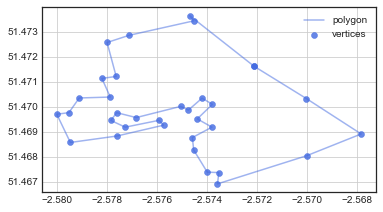

In [23]:
x=df.loc[0,:]
y=df.loc[1,:]

fig, ax = plt.subplots()
ax.scatter(x, y, label='vertices', alpha = 0.8, c=colour)
ax.plot(x, y, label='polygon', alpha = 0.5, c=colour)
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(), ax.set_aspect('equal')

Method 1: Centroid of a polygon [(source)](https://en.wikipedia.org/wiki/Centroid#:~:text=%5B18%5D-,Of%20a%20polygon,-%5Bedit%5D)

In [24]:
def poly_centroid(coords_list, entry):
    A, Cx, Cy = 0, 0, 0
    for i in range(0, len(coords_list[entry])-1):
        A += (x[i]*y[i+1] - x[i+1]*y[i])
        Cx += (x[i] + x[i+1])*(x[i]*y[i+1] - x[i+1]*y[i])
        Cy += (y[i] + y[i+1])*(x[i]*y[i+1] - x[i+1]*y[i])

    A = A/2
    Cx = Cx/(6*A)
    Cy = Cy/(6*A)
    
    return Cx, Cy

In [25]:
m1Cx, m1Cy = poly_centroid(dev_shapes['coords'], 0)

Method 2: K-Means clustering using sci-kit learn

In [26]:
kmeans = KMeans(n_clusters=1, random_state=0).fit(dev_shapes['coords'][0])
m2Cx, m2Cy = kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Compare methods and plot each on single polygon

In [27]:
print(m1Cx, m1Cy, m2Cx, m2Cy)

-2.5740352970769576 51.47018970697111 -2.5754039500073325 51.46992482320055


(None, None)

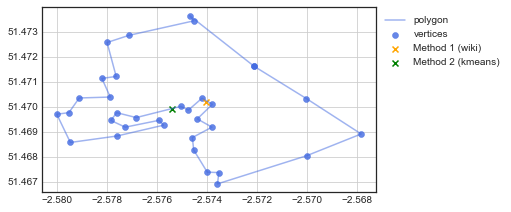

In [28]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='vertices', alpha = 0.8, c=colour)
ax.plot(x, y, label='polygon', alpha = 0.5, c=colour)
ax.scatter(m1Cx, m1Cy, label='Method 1 (wiki)', c='orange', marker='x')
ax.scatter(m2Cx, m2Cy, label='Method 2 (kmeans)', c='green', marker='x')
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(), ax.set_aspect('equal')

#### Grid of Sub-Plots

(None, None)

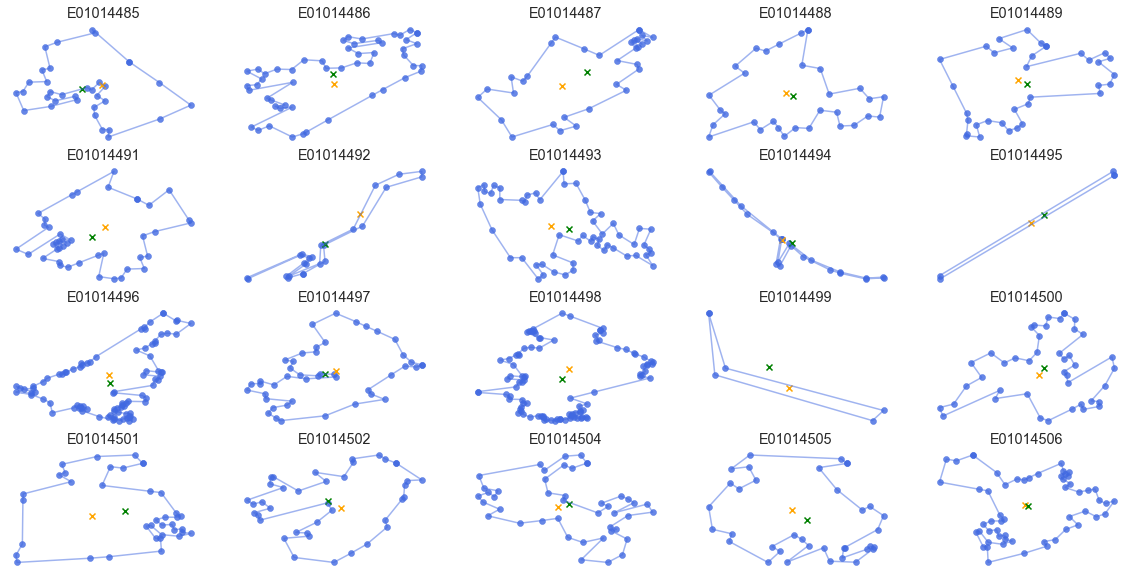

In [29]:
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(4, 5, figsize=(20,10))


for i in range(0, 20):
    x = coords_to_dataframe(dev_shapes['coords'], i).loc[0,:]
    y = coords_to_dataframe(dev_shapes['coords'], i).loc[1,:]
    m1Cx, m1Cy = poly_centroid(dev_shapes['coords'], i)
    kmeans = KMeans(n_clusters=1, random_state=0).fit(dev_shapes['coords'][i])
    m2Cx, m2Cy = kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1]
    
    a = i//5
    b = i%5
    
    
    axs[a,b].scatter(x, y, label='vertices', alpha = 0.8, c=colour)
    axs[a,b].plot(x, y, label='polygon', alpha = 0.5, c=colour)
    axs[a,b].scatter(m1Cx, m1Cy, label='Method 1 (wiki)', c='orange', marker='x')
    axs[a,b].scatter(m2Cx, m2Cy, label='Method 2 (kmeans)', c='green', marker='x')
    axs[a,b].set_title(dev_shapes.index[i])
    axs[a,b].axis('off')
    

ax.legend(bbox_to_anchor=(1, 1))
ax.grid(), ax.set_aspect('equal')

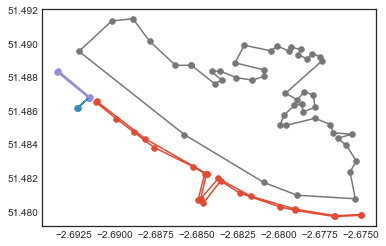

In [30]:
mp = dev_shapes.shapefile[8]['coordinates'] #try this with 6, 8, 9, and 13
for i in range(0, len(mp)):
    df = coords_to_dataframe(mp[i], 0)
    x = df.loc[0,:]
    y = df.loc[1,:]
    plt.scatter(x, y)
    plt.plot(x, y)
    
plt.show()

This is showing that for the entries labelled as 'MultiPolygon' in the GeoJson, only one of the polygons in the entry is being input to the centroid calculator function. Upon consultation with the Choropleth map of the area (note: once I've isolated Bristol polygons from the geojson, plot the choropleth using plotly), it's clear that these LSOAs form the border on the river Avon. A good heuristic approach to extract the most relevant polygons for this dataset and for the set representing the whole UK - would be to use the polygon with the most vertices. 

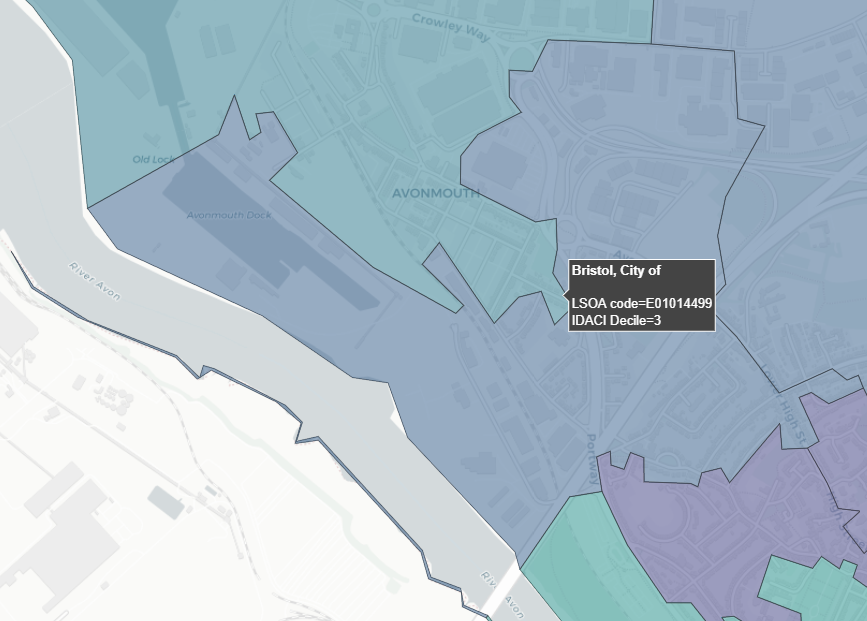

In [31]:
Image(wdir + '\images\E01014499.png') 

#### Apply to entire development data set

In [32]:
Cx = []
Cy = []
for i in range(0, len(dev_shapes['coords'])):
    x = coords_to_dataframe(dev_shapes['coords'], i).loc[0,:]
    y = coords_to_dataframe(dev_shapes['coords'], i).loc[1,:]
    m1Cx, m1Cy = poly_centroid(dev_shapes['coords'], i)
    Cx.append(m1Cx)
    Cy.append(m1Cy)
    
dev_shapes['Cx'] = Cx
dev_shapes['Cy'] = Cy

dev_shapes.drop(columns = ['shapefile', 'coords'], axis=1, inplace=True)
display(dev_shapes)

,Cx,Cy
LSOA,,
E01014485,-2.574035,51.470190
E01014486,-2.578357,51.465865
E01014487,-2.588306,51.469726
E01014488,-2.582122,51.468620
E01014489,-2.587261,51.466037
...,...,...
E01033364,-2.604925,51.437881
E01033366,-2.583574,51.464182
E01033367,-2.591468,51.463664


---

### Cities/Towns <a name="C/T"></a>

Note: Might be best to use city/town coordinates and use some geometry to figure out the nearest LSOA - then zoom to that one

---

### Postcodes <a name="PCs"></a>

---

Note: to improve performance, it may only be necessary to create maps for major cities and towns: create a function(s) to extract data from the dataframe and geojson at specified levels of detail.